# PROJETO MÓDULO 4
#### - Bruno Ribeiro
#### - Rodrigo de Santis
#### - Rogério de Souza
#### - William De Araujo
#### - Fernando Kamikawa Honda

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import requests

df_movies = pd.read_csv('IMDb movies.csv')

### O INTUITO DESTA ANÁLISE É IDENTIFICAR CARACTERÍSTICAS QUE CONFEREM MAIOR PROBABILIDADE DE SUCESSO A UM FILME, DESTA FORMA, CRIANDO DIRETRIZES PARA A PREVISÃO DE SUCESSO OU NÃO DE UM TÍTULO QUE AINDA NÃO FOI LANÇADO
#  
### PARA TANTO, FORAM SELECIONADOS DOIS CONJUNTOS DE TÍTULOS, O PRIMEIRO DELES(G1), COMPOSTO
### POR ELEMENTOS QUE POSSUÍSSEM TANTO NÚMERO DE VOTOS, QUANTO MÉDIA DOS VOTOS ACIMA DA
### MÉDIA

# ESTUDO REALIZADO AFIM DE SELECIONAR OS INTEGRANTES DE G1

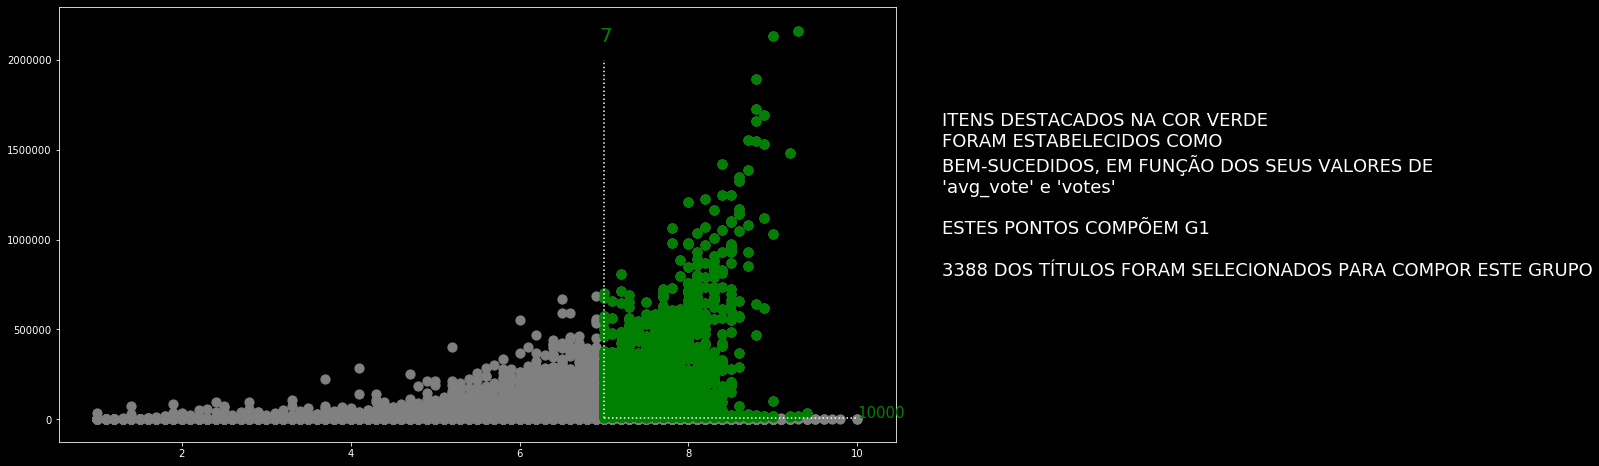

MÉDIAS:
avg_vote       5.926587
votes       9421.771006
dtype: float64
(3388, 22)


In [2]:
plt.rcParams['figure.figsize'] = (15,8)
plt.style.use('dark_background')
plt.scatter(df_movies['avg_vote'], df_movies['votes'], color = 'grey', s = 85)
plt.scatter(df_movies.loc[(df_movies['avg_vote'] >= 7) & (df_movies['votes'] >= 10000), 'avg_vote'],
df_movies.loc[(df_movies['avg_vote'] >= 7) & (df_movies['votes'] >= 10000), 'votes'], color = 'green', s = 85)
plt.plot([7,10], [10000,10000], ls = ':', color = 'white')
plt.plot([7,7], [10000,2000000], ls = ':', color = 'white')
txt_g1 = """ITENS DESTACADOS NA COR VERDE
FORAM ESTABELECIDOS COMO 
BEM-SUCEDIDOS, EM FUNÇÃO DOS SEUS VALORES DE 
'avg_vote' e 'votes'

ESTES PONTOS COMPÕEM G1

3388 DOS TÍTULOS FORAM SELECIONADOS PARA COMPOR ESTE GRUPO"""
plt.text(x = 11, y = 800000 , s = txt_g1, fontsize = 18)
plt.text(x = 6.95, y = 2100000, s = '7', fontsize = 20, color = 'green')
plt.text(x = 10, y = 10000, s = '10000', fontsize = 15, color = 'green')
plt.show()
print('MÉDIAS:')
print(df_movies[['avg_vote', 'votes']].mean())

# DECLARANDO G1
df_g1 = df_movies.loc[(df_movies['avg_vote'] >= 7) & (df_movies['votes'] >= 10000)]
print(df_g1.shape)

# FUNÇÃO UTILIZADA PARA CONTAGEM DE CARACTERÍSTICAS RECORRENTES

In [3]:
def plot_prep_make_df_count(series ,list_of_lists):
    for i in series:
        for n in i.split(','):
            n = n.replace(' ', '')
            list_of_lists[0].append(n)
    for i in list_of_lists[0]:
        if i not in list_of_lists[1]:
            list_of_lists[1].append(i)
    for i in list_of_lists[1]:
        list_of_lists[2].append([i, 0])
    for i in list_of_lists[2]:
        for n in list_of_lists[0]:
            if i[0] == n:
                i[1] += 1
                
# ESTA FUNÇÃO SE FAZ NECESSÁRIA, PRINCIPALMENTE, PARA IDENTIFICAR INDIVIDUALMENTE QUAIS SÃO OS ATORES PRESENTES 
# EM DETERMINADA SERIES, POSTO QUE CADA CAMPO 'actors' DE CADA LINHA CONSISTE EM UMA STRING CONTENDO DIVERSOS NOMES

# EX:
df_g1['actors'][:1]

73    Lillian Gish, Mae Marsh, Robert Harron, F.A. T...
Name: actors, dtype: object

# CÓDIGO RESPONSÁVEL PELA ANÁLISE DAS CARACTERÍSTICAS(G1)

In [4]:
# ESTA CÉLULA PODE LEVAR ALGUM TEMPO PARA RODAR(esta passa as series pela função que realiza a contagem de características)

# OBS: PARA QUE PUDESSE DECLARAR VARIÁVEIS EM 'LOOPs'(criar listas e listas de listas), OPTEI POR FORMATAR STRINGS E 
# EXECUTÁ-LAS COMO CÓDIGO, POR MEIO DO MÉTODO 'exec()', AS STRINGS GERADAS PELOS 'FORs' DESTE BLOCO TÊM ESTE FIM
# OUTROS PROCESSOS, AO LONGO DO PROJETO TAMBÉM FORAM EXECUTADOS DESTA MANEIRA

# O QUE ESTE BLOCO FAZ:
# PASSA SERIES PELA FUNÇÃO 'plot_prep_make_df_count' E CRIA SUAS DEPENDÊNCIAS
# COLOCA OS RESULTADOS OBTIDOS EM DATAFRAMES

# COMO FAZ:
# A FUNÇÃO RECEBE COMO PARÂMETROS, UMA SERIES(que terá cada um de seus possíveis valores identificados, estes terão sua
# frequência contada) E UMA LISTA CONTENDO TRÊS LISTAS
# AS LISTAS CRIADAS À PARTIR DA FORMATAÇÃO DA STRING 'str_plot_prep_g1' SÃO PASSADAS PELA FUNÇÃO 'plot_prep_make_df_count'
# ISTO SE ACONTECE DA SEGUINTE MANEIRA: PRIMEIRAMENTE, PARA QUE SEJAM PASSADAS COMO UM PARÂMETRO NA FUNÇÃO,
# AS 9(nove) LISTAS SÃO DIVIDIDAS ENTRE TRÊS LISTAS, ESTAS SÃO CRIADAS PELA FORMATAÇÃO DA STRING 'str_list_of_lists_g1',
# CADA UMA DESSAS TRÊS LISTAS DE LISTAS, PASSA PELA FUNÇÃO EM CONJUNTO COM SUA RESPECTIVA 
# SERIES(cada uma das listas que passa como parâmetro possui, em seu nome, o nome da series cujos faz a contagem, 
# assim como as listas que a compõem)

# PARA COLOCAR AS INFORMAÇÕES OBTIDAS EM DATAFRAMES E ORDENÁ-LOS, FOI FEITA A FORMATAÇÃO DAS STRINGS 'str_list_to_df_g1_1' e
# 'str_list_to_df_g1_2'

ls_plot_prep_g1_dec_list = ['country_repetidos_g1','country_sem_rep_g1','country_count_g1','director_repetidos_g1',
'director_sem_rep_g1','director_count_g1','actors_repetidos_g1','actors_sem_rep_g1','actors_count_g1']
str_plot_prep_g1 = '{} = []'
for l in ls_plot_prep_g1_dec_list:
    exec(str_plot_prep_g1.format(l))
    
list_of_lists_g1_format = ['country', 'director', 'actors']
str_list_of_lists_g1 = "list_of_lists_{0}_g1 = [{0}_repetidos_g1,{0}_sem_rep_g1,{0}_count_g1]"
for n in range(0, len(list_of_lists_g1_format)):
    exec(str_list_of_lists_g1.format(list_of_lists_g1_format[n]))
    
list_of_lists_of_lists_g1 = [list_of_lists_country_g1,list_of_lists_director_g1,list_of_lists_actors_g1]                
series_list_g1 = [df_g1['country'], df_g1['director'],df_g1['actors']]
for n in range(0, len(list_of_lists_of_lists_g1)):
    plot_prep_make_df_count(series_list_g1[n], list_of_lists_of_lists_g1[n])
    
str_list_to_df_g1_1 = "df_{0}_count_g1 = pd.DataFrame({0}_count_g1, columns = ['{0}', 'count'])"
str_list_to_df_g1_2 = "df_{0}_count_g1 = df_{0}_count_g1.sort_values(by = 'count', ascending = False)"
for n in range(0, len(list_of_lists_g1_format)):
    exec(str_list_to_df_g1_1.format(list_of_lists_g1_format[n]))
    exec(str_list_to_df_g1_2.format(list_of_lists_g1_format[n]))
    
# À GROSSO MODO, ESTE BLOCO RECEBE AS SERIES: df_g1['country'], df_g1['director'], df_g1['actors'] E ENTREGA OS
# DATAFRAMES 'df_country_count_g1', 'df_director_count_g1', 'df_actors_count_g1'

# CÓDIGO RESPONSÁVEL PELOS PLOTs DAS INFORMAÇÕES OBTIDAS(G1) 

In [5]:
def plot_genre_g1():
    
    plt.bar(df_g1['genre'].value_counts().head(10).index,df_g1['genre'].value_counts().head(10))
    plt.xticks(rotation = 'vertical')
    plt.title('GÊNEROS EM G1')
    plt.show()
    
def plot_duration_g1():

    y_axs_g1 = [len(df_g1.loc[(df_g1['duration'] >= 45) & (df_g1['duration'] < 98)]),
    len(df_g1.loc[(df_g1['duration'] >= 98) & (df_g1['duration'] < 151)]),
    len(df_g1.loc[(df_g1['duration'] >= 151) & (df_g1['duration'] < 204)]),
    len(df_g1.loc[(df_g1['duration'] >= 204) & (df_g1['duration'] < 257)]),
    len(df_g1.loc[(df_g1['duration'] >= 257) & (df_g1['duration'] < 310)]),
    len(df_g1.loc[(df_g1['duration'] >= 310) & (df_g1['duration'] <= 366)])]

    labels_duration_g1 = ['45-97', '98-150', '151-203', '204-256', '257-309', '310-366']
    colors_duration_g1 = [(1,1,0.5), (1,1,0.2), (0.9,0.6,0.3), (1,0.3,0.3), (1,0.1,0.1), (1,0,0)]

    for n in range(0, 6):
        plt.bar(n, y_axs_g1[n], label = labels_duration_g1[n], color = colors_duration_g1[n])

    plt.xticks([])
    plt.yticks([])
    plt.title('DURAÇÃO EM G1')
    plt.legend(bbox_to_anchor = (1.2, 1.025), title = 'DURAÇÃO(min)', fontsize = 18)
    txt_duration_g1 = '''     MÉDIA: 117 min
     
     MÁXIMA: 45 min
     MÍNIMA: 366 min'''
    plt.text(x = 5.5, y = 2, s = txt_duration_g1, fontsize = 22)
    plt.show()
    
def plot_duration2_g1():
    
    y_axs_g1 = [len(df_g1.loc[(df_g1['duration'] >= 45) & (df_g1['duration'] < 62.5)]),
    len(df_g1.loc[(df_g1['duration'] >= 62.5) & (df_g1['duration'] < 80)]),
    len(df_g1.loc[(df_g1['duration'] >= 80) & (df_g1['duration'] < 97.5)]),
    len(df_g1.loc[(df_g1['duration'] >= 97.5) & (df_g1['duration'] < 115)]),
    len(df_g1.loc[(df_g1['duration'] >= 115) & (df_g1['duration'] < 132.5)]),
    len(df_g1.loc[(df_g1['duration'] >= 132.5) & (df_g1['duration'] <= 150)])]

    labels_duration_g1 = ['45-62.4', '62.5-79', '121-97.4', '97.5-114', '115-132.4', '132.5-150']
    colors_duration_g1 = [(1,1,0.5), (1,1,0.2), (0.9,0.6,0.3), (1,0.3,0.3), (1,0.1,0.1), (1,0,0)]

    for n in range(0, 6):
        plt.bar(n, y_axs_g1[n], label = labels_duration_g1[n], color = colors_duration_g1[n])
    plt.legend(bbox_to_anchor = (1.22, 1.025), title = 'DURAÇÃO(min)', fontsize = 18)
    plt.xticks([])
    plt.yticks([])
    plt.title('DISTRIBUIÇÃO DOS FILMES NO INTERVALO DE 45-150(G1)')
    plt.show()
    
def plot_country_g1():
    
    plt.bar(df_country_count_g1['country'], df_country_count_g1['count'])
    plt.xticks(rotation = 'vertical')
    plt.title('PAÍSES EM G1')
    plt.show()

def plot_director_g1():

    plt.bar(df_director_count_g1.head(10)['director'],df_director_count_g1.head(10)['count'])
    plt.xticks(rotation = 'vertical')
    plt.title('DIRETORES EM G1')
    plt.show()
    
def plot_actors_g1():
    
    plt.bar(df_actors_count_g1.head(10)['actors'], df_actors_count_g1.head(10)['count'])
    plt.xticks(rotation = 'vertical')
    plt.title('ATORES EM G1')
    plt.show()
    
def plots_g1():
    plot_list = ['genre', 'duration', 'duration2','country', 'director', 'actors']
    str_plot_format = 'plot_{}_g1()'
    for n in range(0, len(plot_list)):
        exec(str_plot_format.format(plot_list[n]))

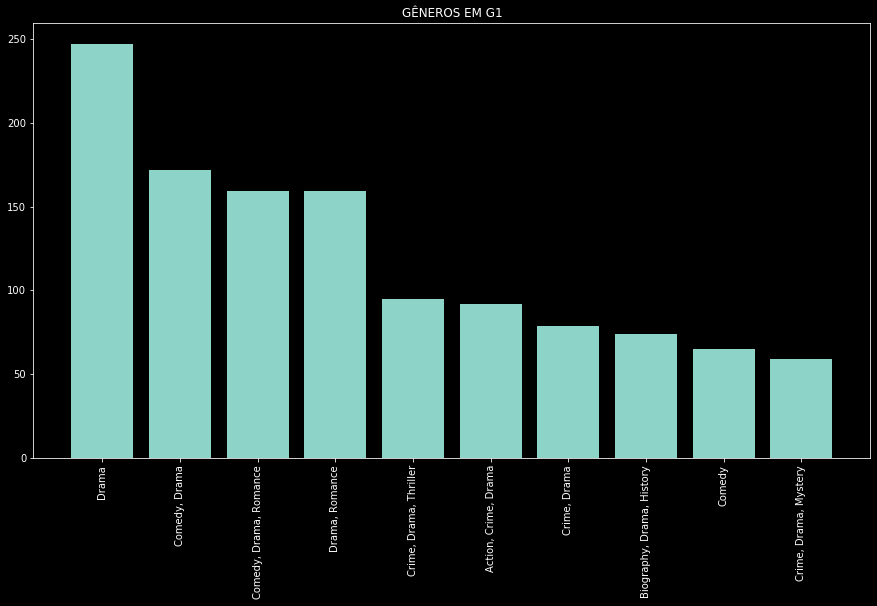

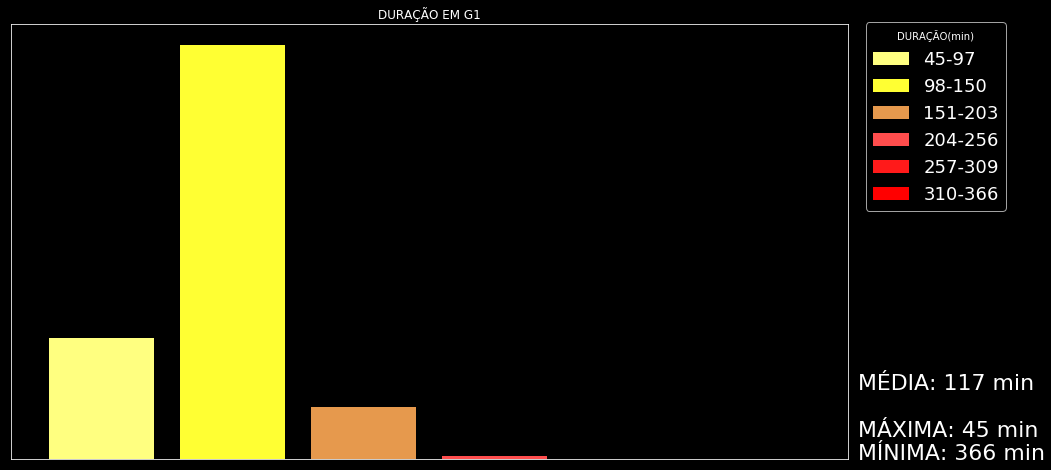

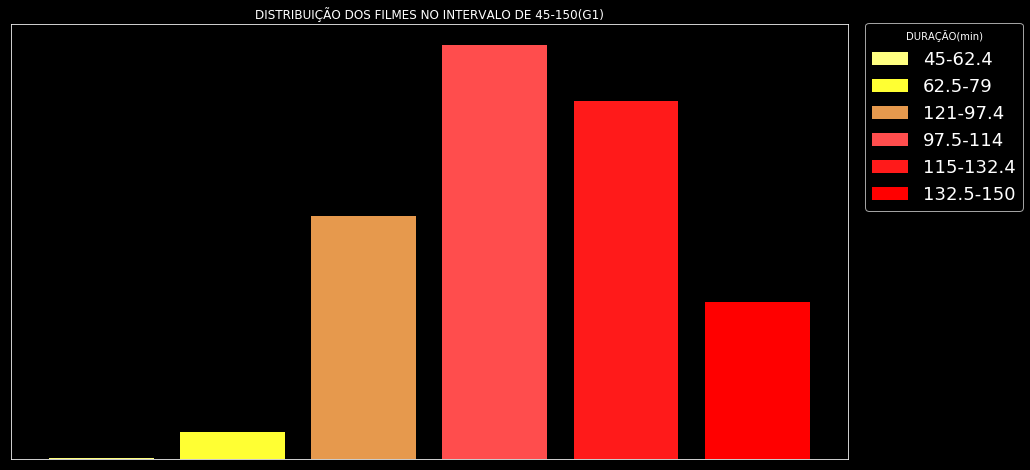

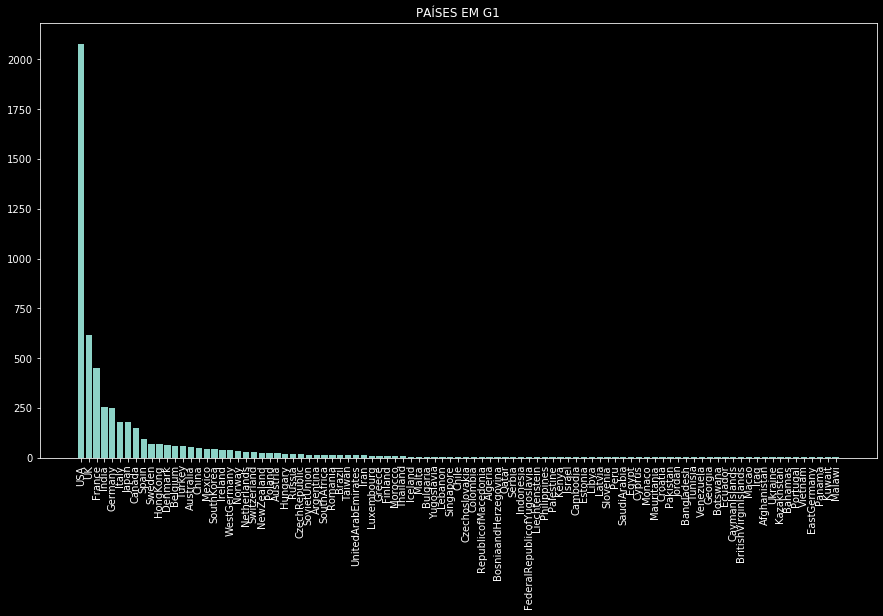

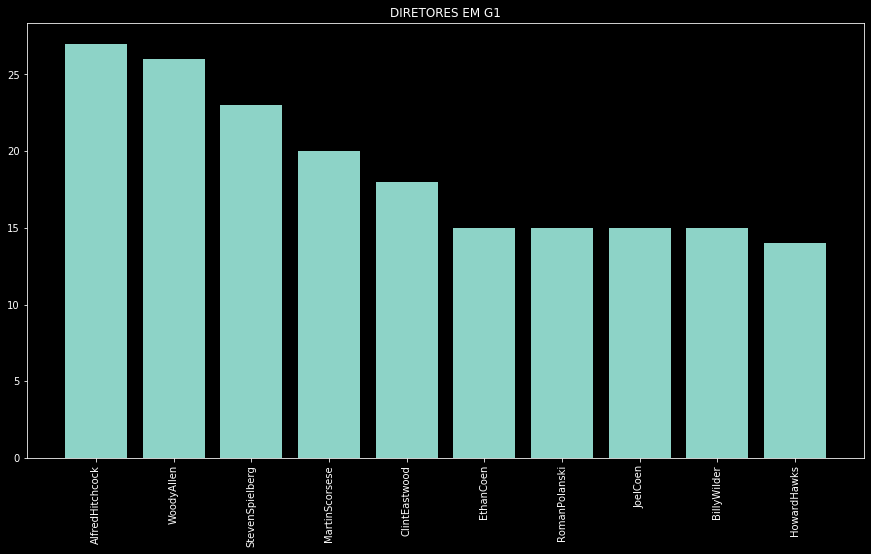

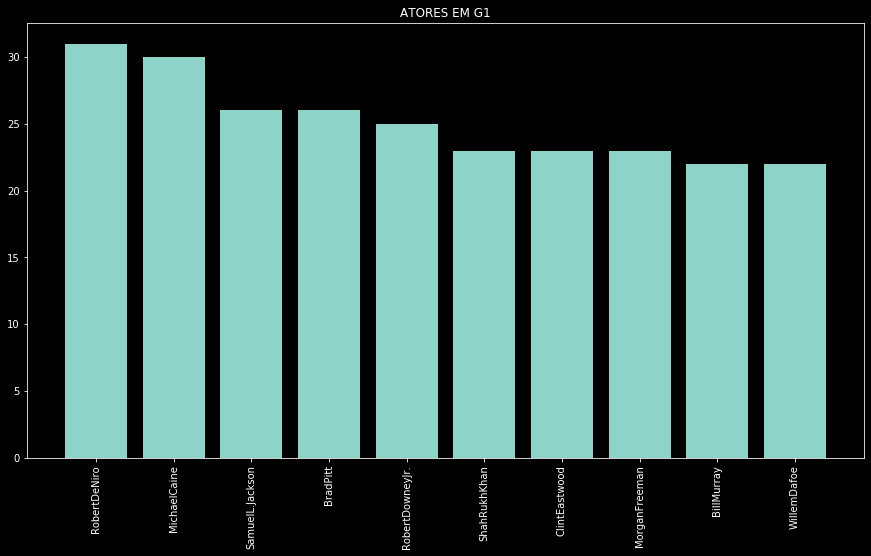

In [6]:
# ESTA FUNÇÃO CONSOLIDA OS PLOTS DAS INFORMAÇÕES OBTIDAS NA ANÁLISE DE G1, AFIM DE EXIBÍ-LOS EM UM ÚNICO OUTPUT, 
# OPTEI POR FAZÊ-LO DESTA FORMA, UMA VEZ QUE ACREDITO QUE O CÓDIGO DE UM SUBPLOT FICARIA MENOS LIMPO E O OUTPUT EM SI
# NÃO SERIA SATISFATÓRIO

plots_g1()

### PARA A COMPOSIÇÃO DO SEGUNDO GRUPO(G2), FORAM SELECIONADOS OS FILMES QUE OBTIVERAM LUCRO
### ACIMA DA MÉDIA, ESTE FOI CALCULADO À PARTIR DA SUBTRAÇÃO DO VALOR DA COLUNA 'budget' DO VALOR 
### PRESENTE EM 'worlwide_gross_income'
#  
### TODAS AS MOEDAS FORAM CONVERTIDAS PARA O DÓLAR, EM VIRTUDE DA DISPONIBILIDADE LIMITADA DE 
### TAXAS DE CONVERSÃO DE ALGUMAS MOEDAS PARA ALGUNS ANOS, ESTA ANÁLISE É DIRECIONADA
### AO INTERVALO DE 2000-2019, FOI UTILIZADA A MÉDIA DA TAXA DE CADA ANO

In [7]:
# O ESTUDO DE LUCRO SERÁ FEITO EM CIMA DO SLICE DO DATAFRAME INCIAL CRIADO NESTA CÉLULA

# NESTE BLOCO:
# PREPARO O DATAFRAME PARA A ANÁLISE 
# ME CERTIFICO DE QUE OS ITENS A SEREM ESTUDADOS POSSUEM OS CAMPOS 'budget' E 'worlwide_gross_income' PREENCHIDOS E 
# QUE TENHAM SIDO LANÇADOS ENTRE 2000 - 2019 E
# TENHAM SEUS CAMPOS 'year' NO FORMATO 'int'

df_fin = df_movies.loc[(df_movies['worlwide_gross_income'].isnull() == False) &
(df_movies['budget'].isnull() == False) & (df_movies['year'].isnull() == False) & (df_movies['year'] >= 2000)]
df_fin['year'] = df_fin['year'].astype(int)
clear_output()
df_fin.shape

(9427, 22)

In [8]:
# BLOCO CONTENDO OS COMPONENTES DAS STRINGS QUE SERÃO FORMATADAS E EXECUATDAS COM O MÉTODO 'exec()'
# E AS TAXAS DE CONVERSÃO(optei por manter estas informações 'hard coded' no notebook, posto que o 
# 'web scraping' levaria algum tempo para ser finalizado, além disso, queria garantir que
# as informações estariam disponíveis mesmo que o site saísse do ar, entretanto, incluí ao final deste notebook, 
# o código que poderia buscar por estas informações automaticamente)


dfs_fin=['df_fin_dkk','df_fin_eur','df_fin_inr','df_fin_brl','df_fin_zar','df_fin_sek','df_fin_hkd',
'df_fin_bgl','df_fin_cny','df_fin_krw','df_fin_jpy','df_fin_rur','df_fin_cad','df_fin_frf','df_fin_gbp',
'df_fin_aud','df_fin_fim','df_fin_huf','df_fin_trl','df_fin_bnd','df_fin_isk','df_fin_dem','df_fin_nok',
'df_fin_czk','df_fin_nzd','df_fin_sgd','df_fin_myr','df_fin_thb','df_fin_mxn','df_fin_lvl','df_fin_twd',
'df_fin_egp','df_fin_chf','df_fin_ars','df_fin_idr','df_fin_eek','df_fin_uah','df_fin_esp','df_fin_ron',
'df_fin_pln','df_fin_itl','df_fin_ats','df_fin_cop','df_fin_php','df_fin_hrk','df_fin_pkr','df_fin_irr',
'df_fin_dop','df_fin_ils','df_fin_amd','df_fin_nlg','df_fin_ltl','df_fin_yum','df_fin_ngn','df_fin_bdt',
'df_fin_aed','df_fin_clp','df_fin_skk','df_fin_veb']
currs = ["'DKK'","'EUR'","'INR'","'BRL'","'ZAR'","'SEK'","'HKD'","'BGL'","'CNY'","'KRW'","'JPY'","'RUR'",
"'CAD'","'FRF'","'GBP'","'AUD'","'FIM'",
"'HUF'","'TRL'","'BND'","'ISK'","'DEM'","'NOK'","'CZK'","'NZD'","'SGD'","'MYR'","'THB'","'MXN'","'LVL'",
"'TWD'","'EGP'","'CHF'","'ARS'","'IDR'","'EEK'","'UAH'","'ESP'","'RON'","'PLN'","'ITL'","'ATS'","'COP'",
"'PHP'","'HRK'","'PKR'","'IRR'","'DOP'","'ILS'","'AMD'","'NLG'","'LTL'","'YUM'","'NGN'","'BDT'","'AED'",
"'CLP'","'SKK'","'VEB'"]
lista_exs=['ex_dkk','ex_eur','ex_inr','ex_brl','ex_zar','ex_sek','ex_hkd','ex_bgl_ou_bgn','ex_cny','ex_krw',
'ex_jpy','ex_rur_ou_rub','ex_cad','ex_frf','ex_gbp','ex_aud','ex_fim','ex_huf','ex_trl','ex_bnd','ex_isk',
'ex_dem','ex_nok','ex_czk','ex_nzd','ex_sgd','ex_myr','ex_thb','ex_mxn','ex_lvl','ex_twd','ex_egp','ex_chf',
'ex_ars','ex_idr','ex_eek','ex_uah','ex_esp','ex_ron','ex_pln','ex_itl','ex_ats','ex_cop','ex_php','ex_hrk',
'ex_pkr','ex_irr','ex_dop','ex_ils','ex_amd','ex_nlg','ex_ltl','ex_yum','ex_ngn','ex_bdt','ex_aed','ex_clp',
'ex_skk','ex_veb']
dfs_ex=['df_ex_dkk','df_ex_eur','df_ex_inr','df_ex_brl','df_ex_zar','df_ex_sek','df_ex_hkd','df_ex_bgl',
'df_ex_cny','df_ex_krw','df_ex_jpy','df_ex_rur','df_ex_cad','df_ex_frf','df_ex_gbp','df_ex_aud','df_ex_fim',
'df_ex_huf','df_ex_trl','df_ex_bnd','df_ex_isk','df_ex_dem','df_ex_nok','df_ex_czk','df_ex_nzd','df_ex_sgd',
'df_ex_myr','df_ex_thb','df_ex_mxn','df_ex_lvl','df_ex_twd','df_ex_egp','df_ex_chf','df_ex_ars','df_ex_idr',
'df_ex_eek','df_ex_uah','df_ex_esp','df_ex_ron','df_ex_pln','df_ex_itl','df_ex_ats','df_ex_cop','df_ex_php',
'df_ex_hrk','df_ex_pkr','df_ex_irr','df_ex_dop','df_ex_ils','df_ex_amd','df_ex_nlg','df_ex_ltl','df_ex_yum',
'df_ex_ngn','df_ex_bdt','df_ex_aed','df_ex_clp','df_ex_skk','df_ex_veb']

ex_dkk=[[2000,0.123853],[2001,0.120233],[2002,0.126836],[2003,0.152622],[2004,0.167169],[2005,0.167262],
[2006,0.168395],[2007,0.183925],[2008,0.197345],[2009,0.187295],[2010,0.17824],[2011,0.186906],[2012,0.172706],
[2013,0.178081],[2014,0.178286],[2015,0.148777],[2016,0.148621],[2017,0.151911],[2018,0.158421],[2019,0.149936]]
ex_eur=[[2000,0.923498],[2001,0.895969],[2002,0.942468],[2003,1.134134],[2004,1.244143],[2005,1.246376],
[2006,1.256316],[2007,1.370412],[2008,1.471366],[2009,1.39448],[2010,1.327386],[2011,1.392705],[2012,1.285697],
[2013,1.328464],[2014,1.329165],[2015,1.109729],[2016,1.10656],[2017,1.130051],[2018,1.181011],[2019,1.120125]]
ex_inr=[[2000,0.022228],[2001,0.021149],[2002,0.020596],[2003,0.021459],[2004,0.022097],[2005,0.022708],
[2006,0.022097],[2007,0.024311],[2008,0.023141],[2009,0.020698],[2010,0.021879],[2011,0.021491],[2012,0.018749],
[2013,0.017131],[2014,0.016393],[2015,0.015592],[2016,0.014883],[2017,0.015360],[2018,0.014641],[2019,0.014130]]
ex_brl=[[2000,0.546394],[2001,0.427045],[2002,0.353702],[2003,0.325636],[2004,0.342389],[2005,0.413384],
[2006,0.460051],[2007,0.515753],[2008,0.555809],[2009,0.507527],[2010,0.568917],[2011,0.599180],[2012,0.513917],
[2013,0.465257],[2014,0.426195],[2015,0.304531],[2016,0.288770],[2017,0.313570],[2018,0.275329],[2019,0.267390]]
ex_zar=[[2000,0.144773],[2001,0.118077],[2002,0.095114],[2003,0.133973],[2004,0.15577],[2005,0.15759],
[2006,0.148829],[2007,0.141979],[2008,0.123008],[2009,0.120309],[2010,0.136853],[2011,0.138596],[2012,0.122024],
[2013,0.104037],[2014,0.092298],[2015,0.078806],[2016,0.068218],[2017,0.075257],[2018,0.075952],[2019,0.06927]]
ex_sek=[[2000,0.109462],[2001,0.09699],[2002,0.102867],[2003,0.124372],[2004,0.136263],[2005,0.134385],
[2006,0.135785],[2007,0.148143],[2008,0.153504],[2009,0.131543],[2010,0.139097],[2011,0.154216],[2012,0.147738],
[2013,0.153515],[2014,0.146204],[2015,0.118576],[2016,0.116948],[2017,0.117239],[2018,0.115162],[2019,0.105791]]
ex_hkd=[[2000,0.128333],[2001,0.128205],[2002,0.128221],[2003,0.12842],[2004,0.12843],[2005,0.128691],
[2006,0.128724],[2007,0.12817],[2008,0.128427],[2009,0.129004],[2010,0.128721],[2011,0.128463],[2012,0.128915],
[2013,0.128921],[2014,0.128955],[2015,0.12899],[2016,0.128827],[2017,0.128327],[2018,0.12759],[2019,0.127629]]
ex_bgl_ou_bgn=[[2000,0.472235],[2001,0.457898],[2002,0.483464],[2003,0.578347],[2004,0.636018],[2005,0.636105],
[2006,0.641990],[2007,0.700714],[2008,0.751985],[2009,0.713129],[2010,0.677817],[2011,0.711683],[2012,0.656902],
[2013,0.679056],[2014,0.679252],[2015,0.567285],[2016,0.565951],[2017,0.577599],[2018,0.603812],[2019,0.583712]]
ex_cny=[[2000,0.120919],[2001,0.120919],[2002,0.120919],[2003,0.120919],[2004,0.120919],[2005,0.122134],
[2006,0.125426],[2007,0.131508],[2008,0.143973],[2009,0.146397],[2010,0.147775],[2011,0.154770],[2012,0.158503],
[2013,0.162665],[2014,0.162321],[2015,0.159130],[2016,0.150561],[2017,0.148010],[2018,0.151317],[2019,0.147308]]
ex_krw=[[2000,0.000885],[2001,0.000776],[2002,0.000804],[2003,0.000840],[2004,0.000875],[2005,0.000977],
[2006,0.001047],[2007,0.001076],[2008,0.000926],[2009,0.000788],[2010,0.000865],[2011,0.000903],[2012,0.000888],
[2013,0.000914],[2014,0.000950],[2015,0.000884],[2016,0.000863],[2017,0.000885],[2018,0.000909],[2019,0.000891]]
ex_jpy=[[2000,0.00928],[2001,0.00824],[2002,0.007985],[2003,0.008648],[2004,0.009256],[2005,0.009109],
[2006,0.0086],[2007,0.008498],[2008,0.009689],[2009,0.0107],[2010,0.011413],[2011,0.012539],[2012,0.012533],
[2013,0.010264],[2014,0.009473],[2015,0.008263],[2016,0.009217],[2017,0.008919],[2018,0.009059],[2019,0.009175]]
ex_rur_ou_rub=[[2000,0.035048],[2001,0.034205],[2002,0.031927],[2003,0.032541],[2004,0.034743],[2005,0.035446],
[2006,0.036804],[2007,0.039123],[2008,0.040369],[2009,0.031631],[2010,0.032925],[2011,0.034079],[2012,0.032196],
[2013,0.031408],[2014,0.026511],[2015,0.016473],[2016,0.015007],[2017,0.017141],[2018,0.015990],[2019,0.014965]]
ex_cad=[[2000,0.673519],[2001,0.646223],[2002,0.636723],[2003,0.718459],[2004,0.770234],[2005,0.826569],
[2006,0.881772],[2007,0.935147],[2008,0.944173],[2009,0.880059],[2010,0.970701],[2011,1.011464],
[2012,1.00023],[2013,0.971164],[2014,0.905912],[2015,0.782992],[2016,0.755107],[2017,0.771282],
[2018,0.771588],[2019,0.753484]]
ex_frf=[[2000,0.140804],[2001,0.136529],[2002,0.144152],[2003,0.172442],[2004,0.189638],[2005,0.189664],
[2006,0.191419],[2007,0.208928],[2008,0.224215],[2009,0.212630],[2010,0.202101],[2011,0.212198],[2012,0.195865],
[2013,0.202470],[2014,0.202529],[2015,0.169144],[2016,0.168746],[2017,0.172220],[2018,0.180035],[2019,0.174042]]
ex_gbp=[[2000,1.514934],[2001,1.440089],[2002,1.499582],[2003,1.635499],[2004,1.832895],[2005,1.820271],
[2006,1.842866],[2007,2.00156],[2008,1.855443],[2009,1.565394],[2010,1.545893],[2011,1.604123],[2012,1.584877],
[2013,1.564768],[2014,1.647701],[2015,1.528504],[2016,1.355673],[2017,1.288611],[2018,1.334801],[2019,1.2766]]
ex_aud=[[2000,0.581223],[2001,0.517943],[2002,0.54305],[2003,0.654801],[2004,0.736399],[2005,0.762474],
[2006,0.753457],[2007,0.838635],[2008,0.853159],[2009,0.792116],[2010,0.919691],[2011,1.033853],[2012,1.035937],
[2013,0.967915],[2014,0.902813],[2015,0.752124],[2016,0.743664],[2017,0.76683],[2018,0.747466],[2019,0.695315]]
ex_fim=[[2000,0.155340],[2001,0.150624],[2002,0.159034],[2003,0.190245],[2004,0.209216],[2005,0.209245],
[2006,0.211181],[2007,0.230498],[2008,0.247363],[2009,0.234582],[2010,0.222966],[2011,0.234106],[2012,0.216086],
[2013,0.223373],[2014,0.223438],[2015,0.186607],[2016,0.186168],[2017,0.190000],[2018,0.198622],[2019,0.192010]]
ex_huf=[[2000,0.003554],[2001,0.003492],[2002,0.003893],[2003,0.004460],[2004,0.004947],[2005,0.005018],
[2006,0.004756],[2007,0.005453],[2008,0.005872],[2009,0.004994],[2010,0.004819],[2011,0.005002],[2012,0.004445],
[2013,0.004474],[2014,0.004305],[2015,0.003579],[2016,0.003554],[2017,0.003654],[2018,0.003707],[2019,0.003570]]
ex_trl=[[2000,0.000002],[2001,0.000001],[2002,0.000001],[2003,0.000001],[2004,0.000001],[2005,0.000001],
[2006,0.000001],[2007,0.000001],[2008,0.000001],[2009,0.000001],[2010,0.000001],[2011,0.000001],[2012,0.000001],
[2013,0.000001],[2014,0],[2015,0],[2016,0],[2017,0],[2018,0],[2019,0]]
ex_bnd=[[2000,0.567020],[2001,0.561209],[2002,0.558827],[2003,0.573768],[2004,0.591870],[2005,0.600796],
[2006,0.629602],[2007,0.663907],[2008,0.707630],[2009,0.688783],[2010,0.734669],[2011,0.795935],[2012,0.800444],
[2013,0.799305],[2014,0.789519],[2015,0.727438],[2016,0.724666],[2017,0.724386],[2018,0.733055],[2019,0.737376]]
ex_isk=[[2000,0.012735],[2001,0.010292],[2002,0.010985],[2003,0.013054],[2004,0.014282],[2005,0.015911],
[2006,0.014367],[2007,0.015652],[2008,0.011448],[2009,0.008096],[2010,0.008219],[2011,0.008623],[2012,0.008006],
[2013,0.008192],[2014,0.008583],[2015,0.007590],[2016,0.008304],[2017,0.009381],[2018,0.009282],[2019,0.008355]]
ex_dem=[[2000,0.472235],[2001,0.457898],[2002,0.483464],[2003,0.578347],[2004,0.636018],[2005,0.636105],
[2006,0.641990],[2007,0.700714],[2008,0.751985],[2009,0.713129],[2010,0.677817],[2011,0.711683],[2012,0.656902],
[2013,0.679056],[2014,0.679252],[2015,0.567285],[2016,0.565951],[2017,0.577599],[2018,0.603812],[2019,0.583712]]
ex_nok=[[2000,0.113761],[2001,0.111301],[2002,0.125546],[2003,0.141177],[2004,0.148662],[2005,0.155489],
[2006,0.156108],[2007,0.171112],[2008,0.179786],[2009,0.15977],[2010,0.165661],[2011,0.178596],[2012,0.171924],
[2013,0.170267],[2014,0.159195],[2015,0.124226],[2016,0.119053],[2017,0.121066],[2018,0.122946],[2019,0.1137]]
ex_czk=[[2000,0.025621],[2001,0.026302],[2002,0.030624],[2003,0.03561],[2004,0.03911],[2005,0.066092],
[2006,0.044338],[2007,0.049409],[2008,0.058966],[2009,0.052882],[2010,0.052507],[2011,0.056685],[2012,0.051162],
[2013,0.05116],[2014,0.048282],[2015,0.040677],[2016,0.040933],[2017,0.042978],[2018,0.04605],[2019,0.043613]]
ex_nzd=[[2000,0.456322],[2001,0.420493],[2002,0.462728],[2003,0.583865],[2004,0.663881],[2005,0.704513],
[2006,0.649732],[2007,0.736172],[2008,0.714949],[2009,0.635232],[2010,0.721623],[2011,0.792322],[2012,0.810275],
[2013,0.8203],[2014,0.8306],[2015,0.699919],[2016,0.697041],[2017,0.711053],[2018,0.692278],[2019,0.658949]]
ex_sgd=[[2000,0.579971],[2001,0.558519],[2002,0.558102],[2003,0.573982],[2004,0.591811],[2005,0.601439],
[2006,0.629447],[2007,0.663878],[2008,0.707702],[2009,0.688386],[2010,0.734244],[2011,0.796016],[2012,0.800533],
[2013,0.799392],[2014,0.789394],[2015,0.727691],[2016,0.724387],[2017,0.724572],[2018,0.741359],[2019,0.733098]]
ex_myr=[[2000,0.263158],[2001,0.263158],[2002,0.263158],[2003,0.263158],[2004,0.263158],[2005,0.264075],
[2006,0.272658],[2007,0.291045],[2008,0.300518],[2009,0.284023],[2010,0.311094],[2011,0.327035],[2012,0.323824],
[2013,0.317649],[2014,0.305810],[2015,0.257196],[2016,0.241674],[2017,0.232708],[2018,0.247912],[2019,0.242896]]
ex_thb=[[2000,0.024965],[2001,0.022487],[2002,0.023259],[2003,0.024091],[2004,0.024819],[2005,0.039187],
[2006,0.026399],[2007,0.030928],[2008,0.030381],[2009,0.029148],[2010,0.031571],[2011,0.032814],[2012,0.032191],
[2013,0.032593],[2014,0.030789],[2015,0.029245],[2016,0.028339],[2017,0.029494],[2018,0.030957],[2019,0.032232]]
ex_mxn=[[2000,0.10576],[2001,0.107147],[2002,0.104265],[2003,0.100604],[2004,0.131543],[2005,0.146361],
[2006,0.091788],[2007,0.091497],[2008,0.090348],[2009,0.074196],[2010,0.079178],[2011,0.080783],[2012,0.076071],
[2013,0.07841],[2014,0.075232],[2015,0.085766],[2016,0.053655],[2017,0.053033],[2018,0.052073],[2019,0.051963]]
ex_lvl=[[2000,1.650388],[2001,1.598794],[2002,1.626079],[2003,1.764809],[2004,1.804564],[2005,1.770214],
[2006,1.786591],[2007,1.950015],[2008,2.092696],[2009,1.984611],[2010,1.886293],[2011,1.977322],[2012,1.842565],
[2013,1.893335],[2014,1.890286],[2015,1.578695],[2016,1.574981],[2017,1.607400],[2018,1.680347],[2019,1.624409]]
ex_twd=[[2000,0.031957],[2001,0.029436],[2002,0.029013],[2003,0.029074],[2004,0.029968],[2005,0.031132],
[2006,0.030741],[2007,0.030395],[2008,0.031726],[2009,0.030273],[2010,0.031726],[2011,0.034014],[2012,0.033811],
[2013,0.033683],[2014,0.032998],[2015,0.031492],[2016,0.031025],[2017,0.032865],[2018,0.033183],[2019,0.032434]]
ex_egp=[[2000,0.276166],[2001,0.246767],[2002,0.216485],[2003,0.170882],[2004,0.161000],[2005,0.172492],
[2006,0.174081],[2007,0.177197],[2008,0.183815],[2009,0.180100],[2010,0.177339],[2011,0.168221],[2012,0.164773],
[2013,0.145430],[2014,0.141124],[2015,0.129710],[2016,0.106976],[2017,0.056069],[2018,0.056122],[2019,0.055966]]
ex_chf=[[2000,0.592733],[2001,0.593087],[2002,0.642518],[2003,0.744588],[2004,0.806062],[2005,0.804975],
[2006,0.798421],[2007,0.833817],[2008,0.926073],[2009,0.923614],[2010,0.961215],[2011,1.13241],[2012,1.066891],
[2013,1.079397],[2014,1.094111],[2015,1.040833],[2016,1.015257],[2017,1.01619],[2018,1.022406],[2019,1.006347]]
ex_ars=[[2000,0.982298],[2001,1.000216],[2002,0.348010],[2003,0.338908],[2004,0.340067],[2005,0.342498],
[2006,0.325334],[2007,0.321010],[2008,0.316833],[2009,0.268394],[2010,0.255690],[2011,0.242399],[2012,0.220385],
[2013,0.183752],[2014,0.123845],[2015,0.108782],[2016,0.067856],[2017,0.060598],[2018,0.038160],[2019,0.026717]]
ex_idr=[[2000,0.000113],[2001,0.000098],[2002,0.000108],[2003,0.000117],[2004,0.000112],[2005,0.000103],
[2006,0.000109],[2007,0.000109],[2008,0.000104],[2009,0.000097],[2010,0.000110],[2011,0.000114],[2012,0.000107],
[2013,0.000097],[2014,0.000084],[2015,0.000075],[2016,0.000075],[2017,0.000075],[2018,0.000070],[2019,0.000071]]
ex_eek=[[2000,0.059030],[2001,0.057237],[2002,0.060433],[2003,0.072294],[2004,0.079502],[2005,0.079513],
[2006,0.080249],[2007,0.087590],[2008,0.093998],[2009,0.089141],[2010,0.084727],[2011,0.088961],[2012,0.082113],
[2013,0.084882],[2014,0.084907],[2015,0.070911],[2016,0.070744],[2017,0.072200],[2018,0.075477],[2019,0.072964]]
ex_uah=[[2000,0.180095],[2001,0.185992],[2002,0.187254],[2003,0.186508],[2004,0.187913],[2005,0.195956],
[2006,0.198499],[2007,0.198764],[2008,0.195601],[2009,0.124422],[2010,0.125673],[2011,0.125230],[2012,0.123747],
[2013,0.122623],[2014,0.086564],[2015,0.046525],[2016,0.039152],[2017,0.037620],[2018,0.036753],[2019,0.035855]]
ex_esp=[[2000,0.005551],[2001,0.005382],[2002,0.005683],[2003,0.006798],[2004,0.007476],[2005,0.007477],
[2006,0.007546],[2007,0.008237],[2008,0.008839],[2009,0.008383],[2010,0.007968],[2011,0.008366],[2012,0.007722],
[2013,0.007982],[2014,0.007984],[2015,0.006668],[2016,0.006653],[2017,0.006790],[2018,0.007098],[2019,0.006861]]
ex_ron=[[2000,0.392950],[2001,0.392950],[2002,0.392950],[2003,0.392950],[2004,0.392950],[2005,0.392950],
[2006,0.392950],[2007,0.406022],[2008,0.400527],[2009,0.329005],[2010,0.314896],[2011,0.328621],[2012,0.288289],
[2013,0.300554],[2014,0.298955],[2015,0.249589],[2016,0.246529],[2017,0.247197],[2018,0.253751],[2019,0.242603]]
ex_pln=[[2000,0.228556],[2001,0.244324],[2002,0.268],[2003,0.258107],[2004,0.409267],[2005,0.309577],
[2006,0.322691],[2007,0.366488],[2008,0.421457],[2009,0.323653],[2010,0.332596],[2011,0.339256],[2012,0.307614],
[2013,0.316649],[2014,0.317655],[2015,0.265379],[2016,0.253669],[2017,0.265561],[2018,0.277269],[2019,0.260559]]
ex_itl=[[2000,0.000477],[2001,0.000463],[2002,0.000488],[2003,0.000584],[2004,0.000642],[2005,0.000643],
[2006,0.000648],[2007,0.000708],[2008,0.000760],[2009,0.000720],[2010,0.000685],[2011,0.000719],[2012,0.000664],
[2013,0.000686],[2014,0.000686],[2015,0.000573],[2016,0.000572],[2017,0.000583],[2018,0.000610],[2019,0.000590]]
ex_ats=[[2000,0.067122],[2001,0.065084],[2002,0.068718],[2003,0.082204],[2004,0.090401],[2005,0.090413],
[2006,0.091250],[2007,0.099597],[2008,0.106884],[2009,0.101361],[2010,0.096342],[2011,0.101156],[2012,0.093369],
[2013,0.096518],[2014,0.096546],[2015,0.080631],[2016,0.080442],[2017,0.082098],[2018,0.085823],[2019,0.082966]]
ex_cop=[[2019,0.082966],[2018,0.085823],[2017,0.082098],[2016,0.080442],[2015,0.080631],[2014,0.096546],
[2013,0.096518],[2012,0.093369],[2011,0.101156],[2010,0.096342],[2009,0.101361],[2008,0.106884],[2007,0.099597],
[2006,0.091250],[2005,0.090413],[2004,0.090401],[2003,0.082204],[2002,0.068718],[2001,0.065084],[2000,0.067122]]
ex_php=[[2019,0.019065],[2018,0.018983],[2017,0.019839],[2016,0.021064],[2015,0.021971],[2014,0.022526],
[2013,0.023568],[2012,0.023694],[2011,0.023096],[2010,0.022197],[2009,0.021024],[2008,0.022588],[2007,0.021756],
[2006,0.019508],[2005,0.018168],[2004,0.017831],[2003,0.018419],[2002,0.019396],[2001,0.019553],[2000,0.021595]]
ex_hrk=[[2019,0.153683],[2018,0.159194],[2017,0.151357],[2016,0.146951],[2015,0.145726],[2014,0.174031],
[2013,0.175242],[2012,0.170811],[2011,0.187139],[2010,0.181856],[2009,0.190107],[2008,0.203543],[2007,0.186792],
[2006,0.171434],[2005,0.168120],[2004,0.165902],[2003,0.150064],[2002,0.128126],[2001,0.118895],[2000,0.117088]]
ex_pkr=[[2019,0.007197],[2018,0.008276],[2017,0.009497],[2016,0.009550],[2015,0.009735],[2014,0.009903],
[2013,0.009855],[2012,0.010715],[2011,0.011582],[2010,0.011733],[2009,0.012260],[2008,0.014294],[2007,0.016482],
[2006,0.016594],[2005,0.016777],[2004,0.017140],[2003,0.017301],[2002,0.016811],[2001,0.016050],[2000,0.017989]]
ex_irr=[[2019,0.000024],[2018,0.000025],[2017,0.000030],[2016,0.000032],[2015,0.000034],[2014,0.000039],
[2013,0.000069],[2012,0.000084],[2011,0.000094],[2010,0.000099],[2009,0.000101],[2008,0.000106],[2007,0.000108],
[2006,0.000109],[2005,0.000112],[2004,0.000116],[2003,0.000123],[2002,0.000472],[2001,0.000569],[2000,0.000559]]
ex_dop=[[2019,0.019802],[2018,0.020154],[2017,0.021125],[2016,0.021778],[2015,0.022254],[2014,0.023070],
[2013,0.024029],[2012,0.025568],[2011,0.026416],[2010,0.027377],[2009,0.027876],[2008,0.029042],[2007,0.030265],
[2006,0.030205],[2005,0.034100],[2004,0.026131],[2003,0.039020],[2002,0.054785],[2001,0.060808],[2000,0.061169]]
ex_ils=[[2019,0.271339],[2018,0.278369],[2017,0.278023],[2016,0.260531],[2015,0.257350],[2014,0.280065],
[2013,0.277044],[2012,0.259402],[2011,0.279746],[2010,0.268005],[2009,0.255146],[2008,0.279839],[2007,0.243588],
[2006,0.224818],[2005,0.222935],[2004,0.223434],[2003,0.219586],[2002,0.211538],[2001,0.237272],[2000,0.240603]]
ex_amd=[[2019,0.002059],[2018,0.002070],[2017,0.002072],[2016,0.002082],[2015,0.002093],[2014,0.002410],
[2013,0.002440],[2012,0.002490],[2011,0.002686],[2010,0.002683],[2009,0.002777],[2008,0.003277],[2007,0.002801],
[2006,0.002274],[2005,0.002206],[2004,0.001871],[2003,0.001785],[2002,0.001767],[2001,0.001741],[2000,0.001704]]
ex_nlg=[[2019,0.518054],[2018,0.535894],[2017,0.512629],[2016,0.502291],[2015,0.503475],[2014,0.602847],
[2013,0.602674],[2012,0.583012],[2011,0.631630],[2010,0.601574],[2009,0.632914],[2008,0.667400],[2007,0.621896],
[2006,0.569777],[2005,0.564554],[2004,0.564477],[2003,0.513293],[2002,0.429083],[2001,0.406392],[2000,0.419117]]
ex_ltl=[[2019,0.330642],[2018,0.342028],[2017,0.327180],[2016,0.320581],[2015,0.321337],[2014,0.384760],
[2013,0.384650],[2012,0.372101],[2011,0.403131],[2010,0.383948],[2009,0.403950],[2008,0.425960],[2007,0.396918],
[2006,0.363654],[2005,0.360320],[2004,0.360264],[2003,0.327608],[2002,0.273378],[2001,0.250011],[2000,0.249805]]
ex_yum=[[2019,0.013026],[2018,0.013475],[2017,0.012890],[2016,0.012630],[2015,0.012660],[2014,0.015159],
[2013,0.015154],[2012,0.014660],[2011,0.015882],[2010,0.015127],[2009,0.015915],[2008,0.016782],[2007,0.016747],
[2006,0.016753],[2005,0.016752],[2004,0.017140],[2003,0.017484],[2002,0.015749],[2001,0.038599],[2000,0.235025]]
ex_ngn=[[2019,0.002771],[2018,0.002771],[2017,0.003014],[2016,0.004064],[2015,0.005052],[2014,0.006061],
[2013,0.006278],[2012,0.006299],[2011,0.006418],[2010,0.006616],[2009,0.006694],[2008,0.008427],[2007,0.007964],
[2006,0.007786],[2005,0.007567],[2004,0.007444],[2003,0.007572],[2002,0.008243],[2001,0.008646],[2000,0.009343]]
ex_bdt=[[2019,0.011920],[2018,0.011934],[2017,0.012311],[2016,0.012735],[2015,0.012851],[2014,0.012908],
[2013,0.012793],[2012,0.012206],[2011,0.013513],[2010,0.014347],[2009,0.014548],[2008,0.014598],[2007,0.014537],
[2006,0.014664],[2005,0.015608],[2004,0.016841],[2003,0.017194],[2002,0.017439],[2001,0.017710],[2000,0.018634]]
ex_aed=[[2000,0.272265],[2001,0.272212],[2002,0.272258],[2003,0.27226],[2004,0.272394],[2005,0.432098],
[2006,0.272261],[2007,0.2723],[2008,0.272263],[2009,0.272266],[2010,0.272261],[2011,0.272257],[2012,0.272255],
[2013,0.272256],[2014,0.272256],[2015,0.272259],[2016,0.272258],[2017,0.272261],[2018,0.272251],[2019,0.272252]]
ex_clp=[[2019,0.001481],[2018,0.001562],[2017,0.001542],[2016,0.001480],[2015,0.001532],[2014,0.001755],
[2013,0.002021],[2012,0.002057],[2011,0.002071],[2010,0.001960],[2009,0.001798],[2008,0.001947],[2007,0.001918],
[2006,0.001886],[2005,0.001790],[2004,0.001641],[2003,0.001450],[2002,0.001453],[2001,0.001573],[2000,0.001787]]
ex_skk=[[2019,0.037896],[2018,0.039201],[2017,0.037499],[2016,0.036742],[2015,0.036829],[2014,0.044098],
[2013,0.044085],[2012,0.042647],[2011,0.046204],[2010,0.044005],[2009,0.046298],[2008,0.048820],[2007,0.040602],
[2006,0.033755],[2005,0.032236],[2004,0.031094],[2003,0.027271],[2002,0.022155],[2001,0.020681],[2000,0.021690]]
ex_veb = [[2019,0.000000],[2018,0.000035],[2017,0.000108],[2016,0.000159],[2015,0.000159],[2014,0.000159],
[2013,0.000167],[2012,0.000233],[2011,0.000233],[2010,0.000237],[2009,0.000465],[2008,0.000465],[2007,0.000465],
[2006,0.000465],[2005,0.000475],[2004,0.000532],[2003,0.000613],[2002,0.000904],[2001,0.001380],[2000,0.613124]]

In [9]:
print("'MOEDAS PRESENTES NA COLUNA 'budget', ALÉM DO DÓLAR:")
print(df_fin.loc[df_movies['budget'].str[0] != '$', 'budget'].str[0:3].unique())
print("MOEDAS PRESENTES NA COLUNA 'worlwide_gross_income':")
print(df_fin['worlwide_gross_income'].str[0:3].unique())

# PARA REALIZAR A CONVERSÃO DOS VALORES PRESENTES NO CAMPO 'budget', SERÁ NECESSÁRIO LEVAR EM CONSIDERAÇÃO, TANTO A MOEDA
# EM QUE SE ENCONTRA O VALOR E O ANO EM QUE O FILME EM QUESTÃO FOI LANÇADO
# PARA TANTO, O PRIMEIRO PASSO É DIVIDIR 'df_fin' EM 59 DATAFRAMES, UM PARA CADA MOEDA(além do dólar)
# EM SEGUIDA, CRIAR OS DATAFRAMES CONTENDO AS TAXAS DE CONVERSÃO DE CADA MOEDA E SEUS RESPECTIVOS ANOS(foi utilizada a média
# anual da taxa de conversão), ASSIM, POSSIBILITANDO O 'merge()'(este parea os campos de acordo com o ano)
# ENTRE CADA UM DOS 59 DATAFRAMES, COM SEUS RESPECTIVOS PARES(dataframes contendo as taxas de conversão), 
# A CONCLUSÃO DESTE PROCESSO INCORRE NA PRESENÇA DA COLUNA 'ex_rate' EM CADA UM DOS 59 DATAFRAMES,
# DESTA FORMA, PARA OBTER O VALOR DE 'budget', EM USD, BASTA MULTIPLICAR O MESMO PELO 
# VALOR PRESENTE EM 'ex_rate', PARA CADA LINHA(o resultado deste processo é armazenado na coluna 'bud_usd')
# POSTO QUE OS VALORES DE 'worlwide_gross_income' SE ENCONTRAM SEMPRE EM DÓLAR, NO 'df_fin', UMA VEZ QUE AS ETAPAS 
# DESCRITAS ANTERIORMENTE TENHAM SIDO FINALIZADAS, PARA OBTER O LUCRO, DEVE-SE SUBTRAIR O VALOR PRESENTE EM 'bud_usd'
# DO VALOR EXISTENTE EM 'worlwide_gross_income'(o resultado desta operação é armazenado na coluna 'profit')

# TAMBÉM É CRIADO UM DATAFRAME PARA O DÓLAR, ESTE TÊM SEUS CAMPOS PREENCHIDOS SEPARADAMENTE, PARA QUE SEJA COMPATÍVEL COM
# O RESTO DOS DATAFRAMES

#OBS: também é necessário formatar os campos de 'budget' e 'worlwide_gross_income', posto que, inicialmente, estes não se
# encontram no formato 'int' e possuem siglas ou símbolos não numéricos, discriminando a moeda em que se encontra determinado
# valor

'MOEDAS PRESENTES NA COLUNA 'budget', ALÉM DO DÓLAR:
['EUR' 'FRF' 'AUD' 'DEM' 'CAD' 'BRL' 'SEK' 'GBP' 'ITL' 'INR' 'CZK' 'FIM'
 'NLG' 'ATS' 'CNY' 'HKD' 'DKK' 'BND' 'NOK' 'ESP' 'HUF' 'JPY' 'THB' 'ZAR'
 'SGD' 'PLN' 'KRW' 'EGP' 'EEK' 'MXN' 'NZD' 'CHF' 'SKK' 'BGL' 'TWD' 'LVL'
 'TRL' 'YUM' 'ISK' 'ARS' 'MYR' 'RUR' 'IDR' 'VEB' 'LTL' 'CLP' 'PKR' 'UAH'
 'NGN' 'PHP' 'COP' 'HRK' 'RON' 'IRR' 'DOP' 'ILS' 'AMD' 'BDT' 'AED']
MOEDAS PRESENTES NA COLUNA 'worlwide_gross_income':
['$ 7' '$ 4' '$ 5' '$ 1' '$ 2' '$ 3' '$ 8' '$ 6' '$ 9']


In [10]:
#CRIANDO DATAFRAME DO DÓLAR

# -formatando o campo 'budget'
df_fin_usd = df_fin.loc[df_fin['budget'].str[0] == '$']
df_fin_usd['budget'] = df_fin_usd['budget'].str[2:].astype('int64')

# -formatando o campo 'worlwide_gross_income'
df_fin_usd['worlwide_gross_income'] = df_fin_usd['worlwide_gross_income'].str.replace(' ', '')
df_fin_usd['worlwide_gross_income'] = df_fin_usd['worlwide_gross_income'].str.replace('$', '')
df_fin_usd['worlwide_gross_income'] = df_fin_usd['worlwide_gross_income'].astype('int64')
clear_output()

#CRIANDO UM DATAFRAME PARA CADA UMA DAS OUTRAS MOEDAS 

string_df = "{0} = df_fin.loc[df_fin['budget'].str[0:3] == {1}]"
for n in range(0, len(dfs_fin)):
    exec(string_df.format(dfs_fin[n], currs[n]))

# FORMATANDO OS CAMPOS 'budget' e 'worlwide_gross_income' DE TODOS OS DATAFRAMES CUJA MOEDA DE ORIGEM ERA DIFERENTE DO 
# DÓLAR, UMA VEZ QUE OS ITENS QUE POSSUÍSSEM CADA UMA DAS 59 MOEDAS JÁ ESTÃO AGRUPADOS EM DATAFRAMES ESPECÍFICOS, NÃO É
# MAIS NECESSÁRIO MANTER AS SIGLAS QUE DISCRIMINAVAM EM QUAL MOEDA SE ENCONTRAVAM OS VALORES QUE AS ACOMPANHAVAM, ALÉM DISSO
# NÃO SERIA POSSÍVEL CONVERTER ESTES VALORES NUMÉRICOS PARA O FORMATO 'int', SE OS MESMOS POSSUÍSSEM VALORES NÃO NUMÉRICOS
# EM SUA COMPOSIÇÃO

dfin = [df_fin_dkk,df_fin_eur,df_fin_inr,df_fin_brl,df_fin_zar,df_fin_sek,df_fin_hkd,df_fin_bgl,df_fin_cny,
df_fin_krw,df_fin_jpy,df_fin_rur,df_fin_cad,df_fin_frf,df_fin_gbp,df_fin_aud,df_fin_fim,df_fin_huf,df_fin_trl,
df_fin_bnd,df_fin_isk,df_fin_dem,df_fin_nok,df_fin_czk,df_fin_nzd,df_fin_sgd,df_fin_myr,df_fin_thb,df_fin_mxn,
df_fin_lvl,df_fin_twd,df_fin_egp,df_fin_chf,df_fin_ars,df_fin_idr,df_fin_eek,df_fin_uah,df_fin_esp,df_fin_ron,
df_fin_pln,df_fin_itl,df_fin_ats,df_fin_cop,df_fin_php,df_fin_hrk,df_fin_pkr,df_fin_irr,df_fin_dop,df_fin_ils,
df_fin_amd,df_fin_nlg,df_fin_ltl,df_fin_yum,df_fin_ngn,df_fin_bdt,df_fin_aed,df_fin_clp,df_fin_skk,df_fin_veb]

for i in dfin:
    i['budget'] = i['budget'].str[4:]
    i['budget'] = i['budget'].astype('int64')
    i['worlwide_gross_income'] = i['worlwide_gross_income'].str.replace('$', '')
    i['worlwide_gross_income'] = i['worlwide_gross_income'].str.replace(' ', '')
    i['worlwide_gross_income'] = i['worlwide_gross_income'].astype('int64')
clear_output()

# CRIANDO DATAFRAMES CONTENDO AS TAXAS DE CONVERSÃO DE CADA MOEDA, 
# FAZENDO 'merge' DESTES COM SEUS RESPECTIVOS DATAFRAMES

l1 = "{} = pd.DataFrame({}, columns = ['year', 'ex_rate'])"
l2 = "{} = {}.merge({}, left_on = 'year', right_on = 'year')"
for i in range(0,59):
    exec(l1.format(dfs_ex[i],lista_exs[i]))
    exec(l2.format(dfs_fin[i],dfs_fin[i],dfs_ex[i]))
    
# UNIFICANDO TODOS O DATAFRAMES CUJA MOEDA DE ORIGEM, ERA DIFERENTE DO DÓLAR AGORA COM AS INFORMAÇÕES NECESSÁRIAS
# PARA O CÁLCULO DO LUCRO('profit')

# CALCULANDO O LUCRO PARA OS ITENS CUJA MOEDA DE ORIGEM ERA DIFERENTE DO DÓLAR

df_u = df_fin_dkk.append([df_fin_eur,df_fin_inr,df_fin_brl,df_fin_zar,df_fin_sek,df_fin_hkd,df_fin_bgl,
df_fin_cny,df_fin_krw,df_fin_jpy,df_fin_rur,df_fin_cad,df_fin_frf,df_fin_gbp,df_fin_aud,df_fin_fim,df_fin_huf,
df_fin_trl,df_fin_bnd,df_fin_isk,df_fin_dem,df_fin_nok,df_fin_czk,df_fin_nzd,df_fin_sgd,df_fin_myr,df_fin_thb,
df_fin_mxn,df_fin_lvl,df_fin_twd,df_fin_egp,df_fin_chf,df_fin_ars,df_fin_idr,df_fin_eek,df_fin_uah,df_fin_esp,
df_fin_ron,df_fin_pln,df_fin_itl,df_fin_ats,df_fin_cop,df_fin_php,df_fin_hrk,df_fin_pkr,df_fin_irr,df_fin_dop,
df_fin_ils,df_fin_amd,df_fin_nlg,df_fin_ltl,df_fin_yum,df_fin_ngn,df_fin_bdt,df_fin_aed,df_fin_clp,df_fin_skk,
df_fin_veb])

df_u['bud_usd'] = df_u['budget'] * df_u['ex_rate']
df_u['profit'] = df_u['worlwide_gross_income'] - df_u['bud_usd']

# FORMATANDO O DATAFRAME DO DÓLAR, PARA QUE SEJA COMPATÍVEL COM OS DEMAIS
# CALCULANDO O LUCRO PARA OS ITENS CUJA MOEDA DE ORIGEM ERA O DÓLAR

df_fin_usd['ex_rate'] = [1]*6064
df_fin_usd['bud_usd'] = df_fin_usd['budget']
df_fin_usd['profit'] = df_fin_usd['worlwide_gross_income'] - df_fin_usd['budget']

# ADICIONANDO O DATAFRAME DO DÓLAR AO DATAFRAME QUE CONTÉM TODAS AS OUTRAS MOEDAS
df_u = df_u.append(df_fin_usd, sort = False)
clear_output()

## ESTUDO REALIZADO AFIM DE SELECIONAR OS INTEGRANTES DE G2

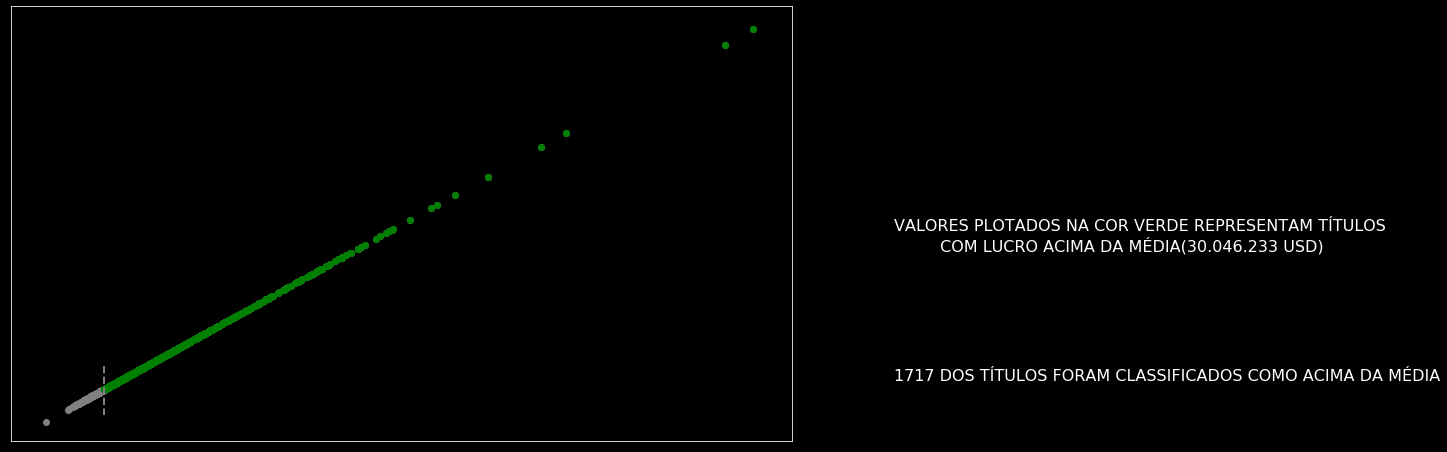

LUCRO MÉDIO: 30245056.435047198
(1717, 25)


In [11]:
df_g2 = df_u.sort_values('profit', ascending = False)

plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (14,8)
plt.scatter(df_g2['profit'], df_g2['profit'], color = 'grey')
plt.scatter(df_g2.loc[df_g2['profit'] > 30046233.112220168, 'profit'], df_g2.loc[df_g2['profit'] > 30046233.112220168,
                             'profit'], color = 'green')
plt.plot([30046233, 30046233], [195000000 , -150000000], ls = '--', color = 'grey', linewidth = 2)
plt.text(x = 3100000000, y = 1000000000, s = """VALORES PLOTADOS NA COR VERDE REPRESENTAM TÍTULOS 
         COM LUCRO ACIMA DA MÉDIA(30.046.233 USD)""", fontsize = 16)

plt.text(x = 3100000000, y = 95000000, s = """1717 DOS TÍTULOS FORAM CLASSIFICADOS COMO ACIMA DA MÉDIA""",
         fontsize = 16)
plt.xticks([])
plt.yticks([])
plt.show()
print('LUCRO MÉDIO:',df_g2['profit'].mean())

# DECLARANDO G2
df_g2 = df_g2.loc[df_g2['profit'] > 30046233.112220168] 
print(df_g2.shape)

# CÓDIGO RESPONSÁVEL PELA ANÁLISE DAS CARACTERÍSTICAS(G2)

In [12]:
# ESTA CÉLULA PODE LEVAR ALGUM TEMPO PARA RODAR(esta passa as series pela função que realiza a contagem de características)

# ESTE BLOCO FUNCIONA DA MESMA FORMA QUE O BLOCO QUE FAZ A ANÁLISE DAS CARACTEÍSTICAS DE G1, COM EXCEÇÃO DE ALTERAÇÕES
# NOS NOMES DAS VARIÁVEIS, O CÓDIGO É IDÊNTICO

ls_plot_prep_g2_dec_list = ['country_repetidos_g2','country_sem_rep_g2','country_count_g2','director_repetidos_g2',
'director_sem_rep_g2','director_count_g2','actors_repetidos_g2','actors_sem_rep_g2','actors_count_g2']
    
str_plot_prep_g2 = '{} = []'
for l in ls_plot_prep_g2_dec_list:
    exec(str_plot_prep_g2.format(l))

list_of_lists_g2_format = ['country', 'director', 'actors']
str_list_of_lists_g2 = "list_of_lists_{0}_g2 = [{0}_repetidos_g2,{0}_sem_rep_g2,{0}_count_g2, '{0}']"
for n in range(0, len(list_of_lists_g2_format)):
    exec(str_list_of_lists_g2.format(list_of_lists_g2_format[n]))
    
series_list_g2 = [df_g2['country'], df_g2['director'], df_g2['actors']]

list_of_lists_of_lists_g2 = [list_of_lists_country_g2,list_of_lists_director_g2,list_of_lists_actors_g2]                

for n in range(0, len(list_of_lists_of_lists_g2)):
    plot_prep_make_df_count(series_list_g2[n], list_of_lists_of_lists_g2[n])
    
list_of_lists_g2_format = ['country', 'director', 'actors']
str_list_to_df_g2_1 = "df_{0}_count_g2 = pd.DataFrame({0}_count_g2, columns = ['{0}', 'count'])"
str_list_to_df_g2_2 = "df_{0}_count_g2 = df_{0}_count_g2.sort_values(by = 'count', ascending = False)"
for n in range(0, len(list_of_lists_g2_format)):
    exec(str_list_to_df_g2_1.format(list_of_lists_g2_format[n]))
    exec(str_list_to_df_g2_2.format(list_of_lists_g2_format[n]))

# CÓDIGO RESPONSÁVEL PELOS PLOTs DAS INFORMAÇÕES OBTIDAS(G2)

In [13]:
def plot_genre_g2():

    plt.bar(df_g2['genre'].value_counts().head(10).index, df_g2['genre'].value_counts().head(10))
    plt.xticks(rotation = 'vertical')
    plt.title('GÊNEROS EM G2')
    plt.show()
    
def plot_duration_g2():
    y_axs_g2 = [len(df_g2.loc[(df_g2['duration'] >= 65) & (df_g2['duration'] < 88)]),
    len(df_g2.loc[(df_g2['duration'] >= 88) & (df_g2['duration'] < 111)]),
    len(df_g2.loc[(df_g2['duration'] >= 111) & (df_g2['duration'] < 134)]),
    len(df_g2.loc[(df_g2['duration'] >= 134) & (df_g2['duration'] < 157)]),
    len(df_g2.loc[(df_g2['duration'] >= 157) & (df_g2['duration'] < 180)]),
    len(df_g2.loc[(df_g2['duration'] >= 180) & (df_g2['duration'] <= 201)])]

    lab_g2 = ['65-87', '88-110', '111-133', '134-156', '157-179','180-201']
    c_g2 = [(1,1,0.5), (1,1,0.2), (0.9,0.6,0.3), (1,0.3,0.3), (1,0.1,0.1), (1,0,0)]
    for n in range(0, 6):
        plt.bar(n, y_axs_g2[n], label = lab_g2[n], color = c_g2[n])

    plt.xticks([])
    plt.yticks([])
    plt.title('DURAÇÃO EM G2')
    plt.title('DISTRIBUIÇÃO DOS FILMES DE G2')
    plt.legend(bbox_to_anchor = (1.2, 1.02), title = 'DURAÇÃO(min)', fontsize = 18)
    txt_duration_g2 = '''     MÉDIA: 111 min
     
     MÁXIMA: 201 min
     MÍNIMA: 65 min'''
    plt.text(x = 5.55, y = 0.8, s = txt_duration_g2, fontsize = 18)
    plt.show()
    
def plot_duration2_g2():
    y_axs_g2 = [len(df_g2.loc[(df_g2['duration'] >= 88) & (df_g2['duration'] < 95.5)]),
    len(df_g2.loc[(df_g2['duration'] >= 95.5) & (df_g2['duration'] < 103)]),
    len(df_g2.loc[(df_g2['duration'] >= 103) & (df_g2['duration'] < 110.5)]),
    len(df_g2.loc[(df_g2['duration'] >= 110.5) & (df_g2['duration'] < 118)]),
    len(df_g2.loc[(df_g2['duration'] >= 118) & (df_g2['duration'] < 125.5)]),
    len(df_g2.loc[(df_g2['duration'] >= 125.5) & (df_g2['duration'] <= 133)])]
    
    lab_g2 = ['88-95.4', '95.5-102', '103-110.4', '110.5-117', '118-125.4','125.5-133']
    c_g2 = [(1,1,0.5), (1,1,0.2), (0.9,0.6,0.3), (1,0.3,0.3), (1,0.1,0.1), (1,0,0)]
    for n in range(0, 6):
        plt.bar(n, y_axs_g2[n], label = lab_g2[n], color = c_g2[n])

    plt.xticks([])
    plt.yticks([])
    plt.title('DURAÇÃO EM G2')
    plt.legend(bbox_to_anchor = (1.22, 1.02), title = 'DURAÇÃO(min)', fontsize = 18)
    
    plt.title('DISTRIBUIÇÃO DOS FILMES NO INTERVALO DE 88-133')
    plt.show()
    
def plot_country_g2():

    plt.bar(df_country_count_g2['country'], df_country_count_g2['count'])
    plt.xticks(rotation = 'vertical')
    plt.title('PAÍSES EM G2')
    plt.show()
    
def plot_director_g2():
    
    plt.bar(df_director_count_g2['director'].head(10),df_director_count_g2['count'].head(10))
    plt.xticks(rotation = 'vertical')
    plt.title('DIRETORES EM G2')
    plt.show()
    
def plot_actors_g2():
    
    plt.bar(df_actors_count_g2['actors'].head(10),df_actors_count_g2['count'].head(10))
    plt.xticks(rotation = 'vertical')
    plt.title('ATORES EM G2')
    plt.show()
    
def plots_g2():
    plot_list = ['genre', 'duration', 'duration2','country', 'director', 'actors']
    str_plot_format = 'plot_{}_g2()'
    for n in range(0, len(plot_list)):
        exec(str_plot_format.format(plot_list[n]))

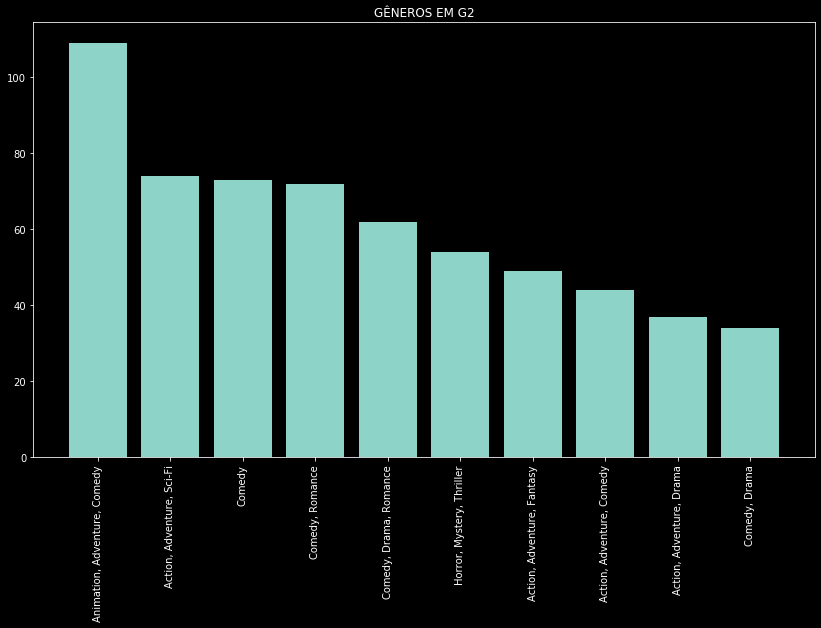

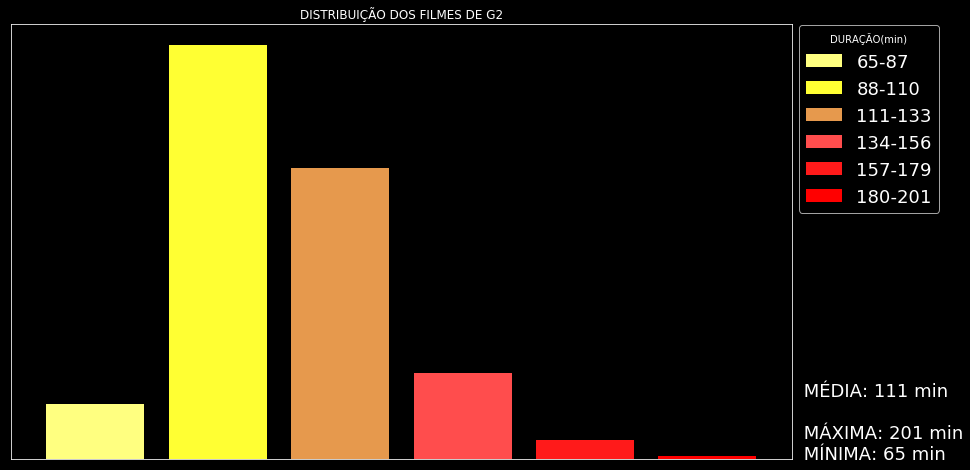

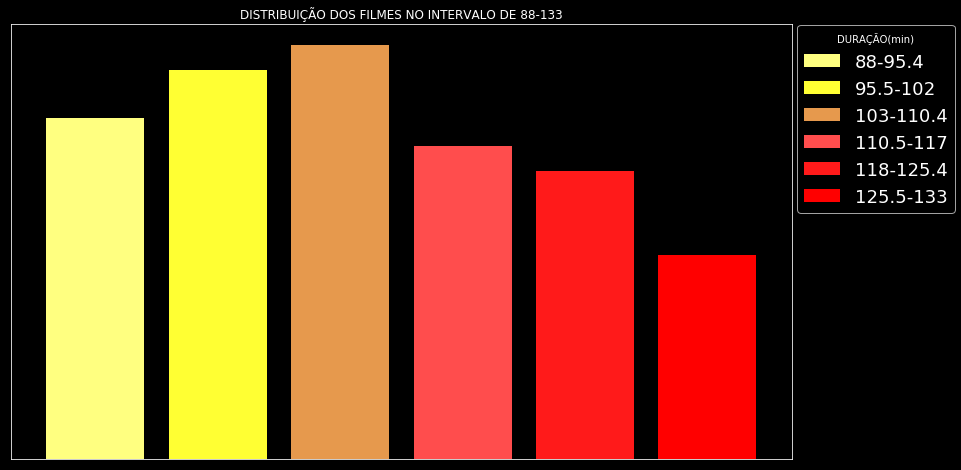

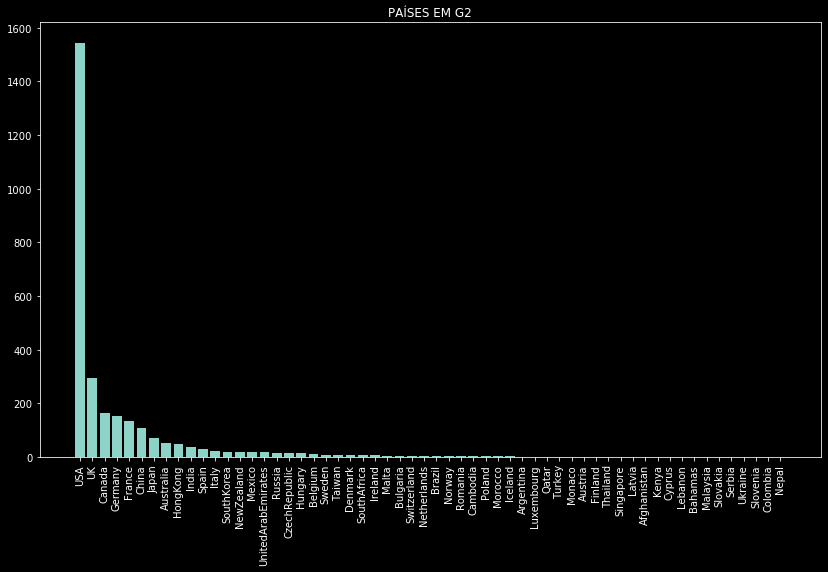

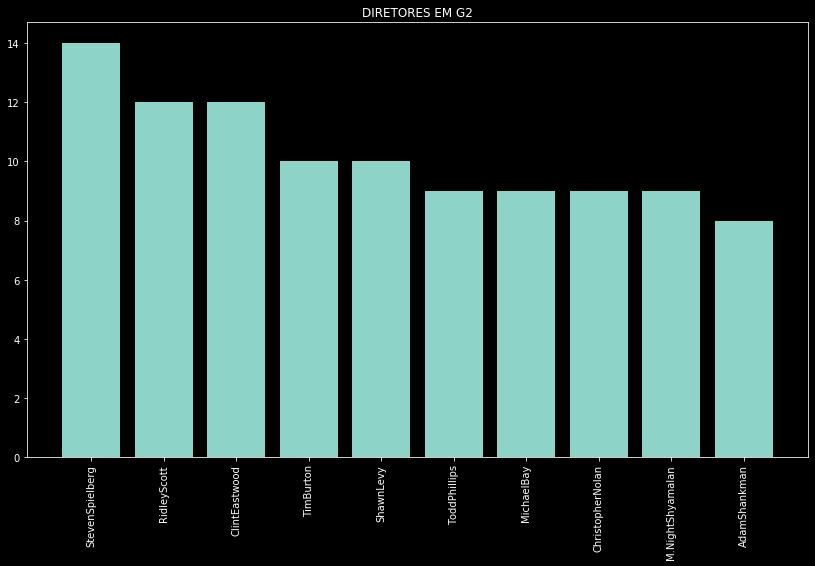

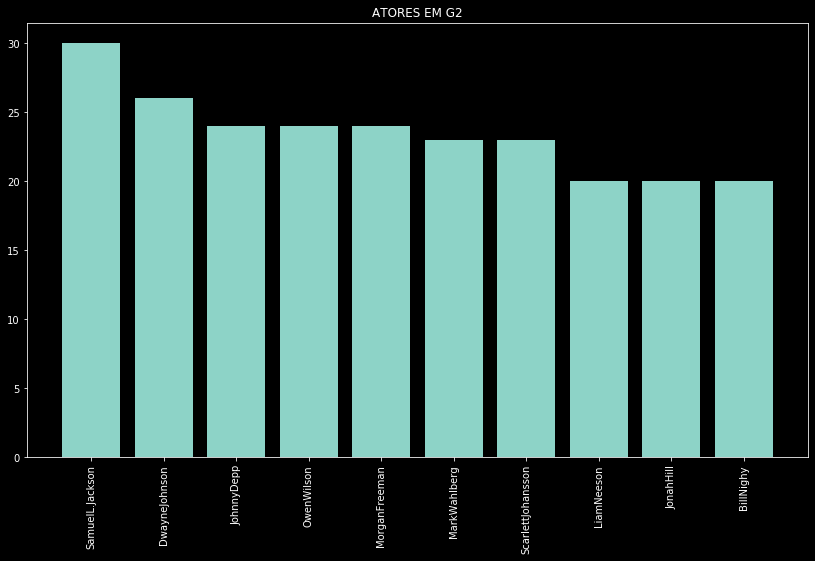

In [14]:
# ESTA FUNÇÃO CONSOLIDA OS PLOTS DAS INFORMAÇÕES OBTIDAS NA ANÁLISE DE G2, AFIM DE EXIBÍ-LOS EM UM ÚNICO OUTPUT, 
# OPTEI POR FAZÊ-LO DESTA FORMA, UMA VEZ QUE ACREDITO QUE O CÓDIGO DE UM SUBPLOT FICARIA MENOS LIMPO E O OUTPUT EM SI
# NÃO SERIA SATISFATÓRIO

plots_g2()

# CRUZAMENTO DOS DADOS OBTIDOS NOS DOIS ESTUDOS

In [15]:
# GÉNEROS G3

g1_topNgenre = df_g1['genre'].value_counts().head(10).index.tolist()
g2_topNgenre = df_g2['genre'].value_counts().head(10).index.tolist()
g3_topNgenre_rep = []
clear_output()
print('ESTES GÊNEROS ESTÃO ENTRE OS TOP 10 DE G1 E G2')
for i in g1_topNgenre:
    if i in g2_topNgenre:
        g3_topNgenre_rep.append(i)
g3_topNgenre = []
for i in g3_topNgenre_rep:
    if i not in g3_topNgenre:
        g3_topNgenre.append(i)
for i in g3_topNgenre:
    print(i, end = '\n')
print('-------------------------------------------')

# ATORES G3

print('ESTES ATORES ESTÃO ENTRE OS TOP 10 DE G1 E G2')
g1_topNactors = df_actors_count_g1.head(10)['actors'].tolist()
g2_topNactors = df_actors_count_g2.head(10)['actors'].tolist()
g3_actors = []
for i in g1_topNactors:
    if i in g2_topNactors:
        g3_actors.append(i)
for i in g3_actors:
    print(i, end = '\n')
print('-------------------------------------------')
print('ESTES DIRETORES ESTÃO ENTRE OS TOP 10 DE G1 E G2')
g1_topNdirectors = df_director_count_g1.head(10)['director'].tolist()
g2_topNdirectors = df_director_count_g2.head(10)['director'].tolist()
g3_directors = []
for i in g1_topNdirectors:
    if i in g2_topNdirectors:
        g3_directors.append(i)
for i in g3_directors:
    print(i, end = '\n')

ESTES GÊNEROS ESTÃO ENTRE OS TOP 10 DE G1 E G2
Comedy, Drama
Comedy, Drama, Romance
Comedy
-------------------------------------------
ESTES ATORES ESTÃO ENTRE OS TOP 10 DE G1 E G2
SamuelL.Jackson
MorganFreeman
-------------------------------------------
ESTES DIRETORES ESTÃO ENTRE OS TOP 10 DE G1 E G2
StevenSpielberg
ClintEastwood


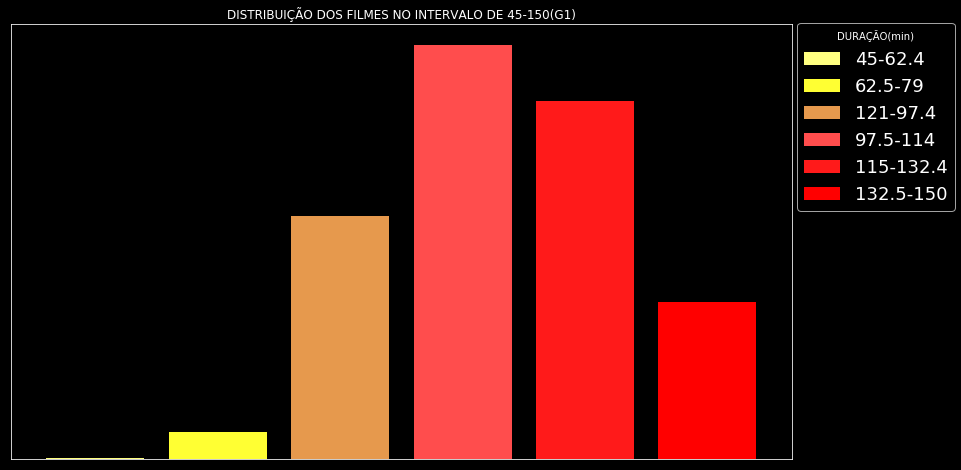

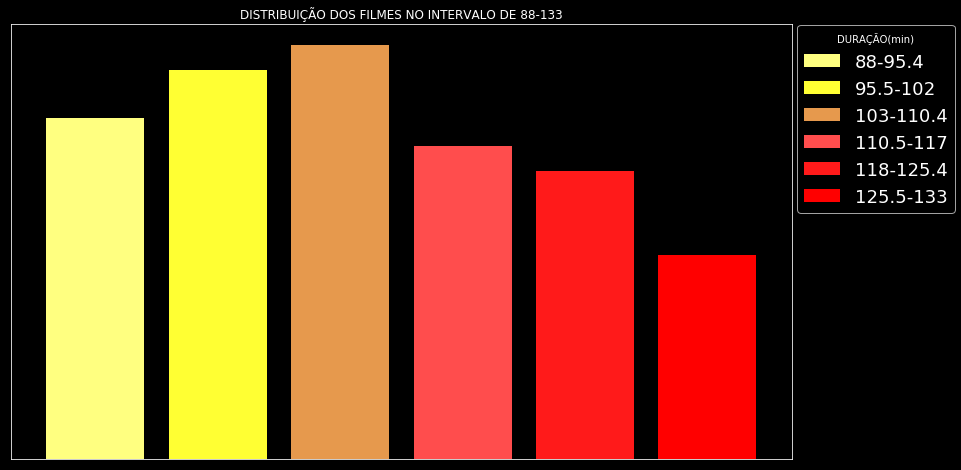

DURAÇÃO IDEAL: 103 - 111


In [16]:
plot_duration2_g1()
plot_duration2_g2()
# INTERSECÇÃO ENTRE INTERVALOS DE TEMPO COM MAIOR NÚMERO DE FILMES DE G1 E G2

d = []
for n in range(97, 114):
    if n in range(103, 112):
        d.append(n)
print('DURAÇÃO IDEAL:', min(d), '-', max(d))

# WEB SCRAPING
#### yum não funciona
#### ron só vai até 2006

In [17]:
currs_get = ["DKK","EUR","INR","BRL","ZAR","SEK","HKD","BGL","CNY","KRW","JPY","RUB","CAD","FRF","GBP","AUD","FIM",
"HUF","TRL","BND","ISK","DEM","NOK","CZK","NZD","SGD","MYR","THB","MXN","LVL","TWD","EGP","CHF","ARS","IDR","EEK",
"UAH","ESP","RON","PLN","ITL","ATS","COP",
"PHP","HRK","PKR","IRR","DOP","ILS","AMD","NLG","LTL","YUM","NGN","BDT","AED",
"CLP","SKK","VEB"]

lista_exs=['ex_dkk','ex_eur','ex_inr','ex_brl','ex_zar','ex_sek','ex_hkd','ex_bgl_ou_bgn','ex_cny','ex_krw','ex_jpy',
'ex_rub','ex_cad','ex_frf','ex_gbp','ex_aud','ex_fim','ex_huf','ex_trl','ex_bnd','ex_isk','ex_dem','ex_nok','ex_czk',
'ex_nzd','ex_sgd','ex_myr','ex_thb','ex_mxn','ex_lvl','ex_twd','ex_egp','ex_chf','ex_ars','ex_idr','ex_eek','ex_uah',
'ex_esp','ex_ron','ex_pln','ex_itl','ex_ats','ex_cop','ex_php','ex_hrk',
'ex_pkr','ex_irr','ex_dop','ex_ils','ex_amd','ex_nlg','ex_ltl','ex_yum','ex_ngn','ex_bdt','ex_aed','ex_clp',
'ex_skk','ex_veb']

dfs_ex_var=['df_ex_dkk','df_ex_eur','df_ex_inr','df_ex_brl','df_ex_zar','df_ex_sek','df_ex_hkd','df_ex_bgl',
'df_ex_cny','df_ex_krw','df_ex_jpy','df_ex_rub','df_ex_cad','df_ex_frf','df_ex_gbp','df_ex_aud','df_ex_fim',
'df_ex_huf','df_ex_trl','df_ex_bnd','df_ex_isk','df_ex_dem','df_ex_nok','df_ex_czk','df_ex_nzd','df_ex_sgd',
'df_ex_myr','df_ex_thb','df_ex_mxn','df_ex_lvl','df_ex_twd','df_ex_egp','df_ex_chf','df_ex_ars','df_ex_idr',
'df_ex_eek','df_ex_uah','df_ex_esp','df_ex_ron','df_ex_pln','df_ex_itl','df_ex_ats','df_ex_cop','df_ex_php',
'df_ex_hrk','df_ex_pkr','df_ex_irr','df_ex_dop','df_ex_ils','df_ex_amd','df_ex_nlg','df_ex_ltl','df_ex_yum',
'df_ex_ngn','df_ex_bdt','df_ex_aed','df_ex_clp','df_ex_skk','df_ex_veb']

In [18]:
# OBS: ESTA CÉLULA REDEFINE OS DATAFRAMES ATRIBUÍDOS ÀS VARIÁVEIS QUE ANTERIORMENTE, CONTINHAM AS TAXAS DE CONVERSÃO

#ACESSA URLS E OBTÉM O OBJETO CUJO ATRIBUTO TEXTO É DE NOSSO INTERESSE
html_format = "{0} = requests.get('https://fxtop.com/en/historical-exchange-rates.php?A=1&C1={1}&C2=USD&YA=1&]DD1=01&MM1=01&YYYY1=2000&B=1&P=&I=1&DD2=01&MM2=01&YYYY2=2019&btnOK=Go%21')"

for n in range(0, len(dfs_ex_var)):
    exec(html_format.format(lista_exs[n], currs_get[n]))

#LÊ OS OBJETOS COM PANDAS
str_get_to_df = '{0} = pd.read_html({1}.text)'
for n in range(0, len(lista_exs)):
    exec(str_get_to_df.format(dfs_ex_var[n], lista_exs[n]))
    
#SEPARA O SLICE DESEJADO DE CADA OBJETO E O FORMATA
for i in dfs_ex_var:
    exec("{0} = {0}[29]".format(i))
    exec("{0} = {0}.drop(columns = [2,3,4]).drop(0)".format(i))

In [19]:
#checar o formato dos dataframes(verifica se os dataframes que contém as taxas de conversão possuem informações pertinentes
# além de verificar se contém o número esperado de linhas)

dfs_ex_col=[df_ex_dkk,df_ex_eur,df_ex_inr,df_ex_brl,df_ex_zar,df_ex_sek,df_ex_hkd,df_ex_bgl,
df_ex_cny,df_ex_krw,df_ex_jpy,df_ex_rub,df_ex_cad,df_ex_frf,df_ex_gbp,df_ex_aud,df_ex_fim,
df_ex_huf,df_ex_trl,df_ex_bnd,df_ex_isk,df_ex_dem,df_ex_nok,df_ex_czk,df_ex_nzd,df_ex_sgd,
df_ex_myr,df_ex_thb,df_ex_mxn,df_ex_lvl,df_ex_twd,df_ex_egp,df_ex_chf,df_ex_ars,df_ex_idr,
df_ex_eek,df_ex_uah,df_ex_esp,df_ex_ron,df_ex_pln,df_ex_itl,df_ex_ats,df_ex_cop,df_ex_php,
df_ex_hrk,df_ex_pkr,df_ex_irr,df_ex_dop,df_ex_ils,df_ex_amd,df_ex_nlg,df_ex_ltl,df_ex_yum,
df_ex_ngn,df_ex_bdt,df_ex_aed,df_ex_clp,df_ex_skk,df_ex_veb]

for n in range(0, len(dfs_ex_col)):
    print(dfs_ex_var[n], dfs_ex_col[n][0].unique())

df_ex_dkk ['2019' '2018' '2017' '2016' '2015' '2014' '2013' '2012' '2011' '2010'
 '2009' '2008' '2007' '2006' '2005' '2004' '2003' '2002' '2001' '2000']
df_ex_eur ['2019' '2018' '2017' '2016' '2015' '2014' '2013' '2012' '2011' '2010'
 '2009' '2008' '2007' '2006' '2005' '2004' '2003' '2002' '2001' '2000']
df_ex_inr ['2019' '2018' '2017' '2016' '2015' '2014' '2013' '2012' '2011' '2010'
 '2009' '2008' '2007' '2006' '2005' '2004' '2003' '2002' '2001' '2000']
df_ex_brl ['2019' '2018' '2017' '2016' '2015' '2014' '2013' '2012' '2011' '2010'
 '2009' '2008' '2007' '2006' '2005' '2004' '2003' '2002' '2001' '2000']
df_ex_zar ['2019' '2018' '2017' '2016' '2015' '2014' '2013' '2012' '2011' '2010'
 '2009' '2008' '2007' '2006' '2005' '2004' '2003' '2002' '2001' '2000']
df_ex_sek ['2019' '2018' '2017' '2016' '2015' '2014' '2013' '2012' '2011' '2010'
 '2009' '2008' '2007' '2006' '2005' '2004' '2003' '2002' '2001' '2000']
df_ex_hkd ['2019' '2018' '2017' '2016' '2015' '2014' '2013' '2012' '2011' '2010'
 

## AS TAXAS DE CONVERSÃO DAS MOEDAS 'YUM' E 'RON' SERIAM OBTIDAS EM OUTRAS FONTES, ENTRETANTO, PARA A GRANDE MAIORIA DAS INFORMAÇÕES NECESSÁRIAS PARA A REALIZAÇÃO DAS CONVERSÕES, O CÓDIGO ACIMA SERIA SUFICIENTE, NOS COMENTÁRIOS INICIAIS SOBRE O GRUPO G2, ELUCIDO PORQUE OPTEI POR NÃO FAZÊ-LO